In [1]:
pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.under_sampling import NearMiss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("transposedCSV.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,0
0,Person_01,0,ECG_ECG_1,21.728105,-0.210206,13.817199,0.240768,9.930746,11.692857,0.996308,...,-0.128886,-0.128580,-0.128434,-0.129542,-0.128968,-0.129040,-0.128927,-0.129132,-0.128843,Person_01
1,NaN,1,ECG_ECG_2,11.777599,2.107501,0.685181,-0.904224,4.206860,19.559812,1.906567,...,-0.143061,-0.119399,-0.076156,-0.251659,-0.186428,-0.177225,-0.169056,-0.168310,-0.162632,Person_01
2,NaN,2,ECG_ECG_3,5.455075,5.119352,-0.226381,0.787679,0.083462,22.429361,3.562693,...,-0.177553,-0.167216,-0.176586,-0.190572,-0.179186,-0.184501,-0.177825,-0.183258,-0.180367,Person_01
3,NaN,3,ECG_ECG_4,8.891512,9.454880,1.580336,3.151586,-1.459394,20.474485,4.746246,...,-0.149355,-0.142214,-0.143288,-0.161009,-0.151126,-0.152309,-0.151184,-0.150931,-0.150573,Person_01
4,NaN,4,ECG_ECG_5,17.439554,4.621039,-1.941839,2.565514,-3.653124,11.861268,9.672180,...,-0.127514,-0.123369,-0.118609,-0.141188,-0.131854,-0.131823,-0.129988,-0.129807,-0.130063,Person_01


In [4]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [5]:
mapping = {'0': 'person'}
df = df.rename(columns=mapping)

In [6]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,993,994,995,996,997,998,999,1000,1001,person
0,21.728105,-0.210206,13.817199,0.240768,9.930746,11.692857,0.996308,1.325309,-0.408698,1.321695,...,-0.128886,-0.128580,-0.128434,-0.129542,-0.128968,-0.129040,-0.128927,-0.129132,-0.128843,Person_01
1,11.777599,2.107501,0.685181,-0.904224,4.206860,19.559812,1.906567,-0.019333,-0.033547,0.891750,...,-0.143061,-0.119399,-0.076156,-0.251659,-0.186428,-0.177225,-0.169056,-0.168310,-0.162632,Person_01
2,5.455075,5.119352,-0.226381,0.787679,0.083462,22.429361,3.562693,-0.612701,0.544027,-0.057700,...,-0.177553,-0.167216,-0.176586,-0.190572,-0.179186,-0.184501,-0.177825,-0.183258,-0.180367,Person_01
3,8.891512,9.454880,1.580336,3.151586,-1.459394,20.474485,4.746246,-0.493598,1.328868,0.017198,...,-0.149355,-0.142214,-0.143288,-0.161009,-0.151126,-0.152309,-0.151184,-0.150931,-0.150573,Person_01
4,17.439554,4.621039,-1.941839,2.565514,-3.653124,11.861268,9.672180,-2.843101,1.861014,-1.345132,...,-0.127514,-0.123369,-0.118609,-0.141188,-0.131854,-0.131823,-0.129988,-0.129807,-0.130063,Person_01


<AxesSubplot:xlabel='person', ylabel='count'>

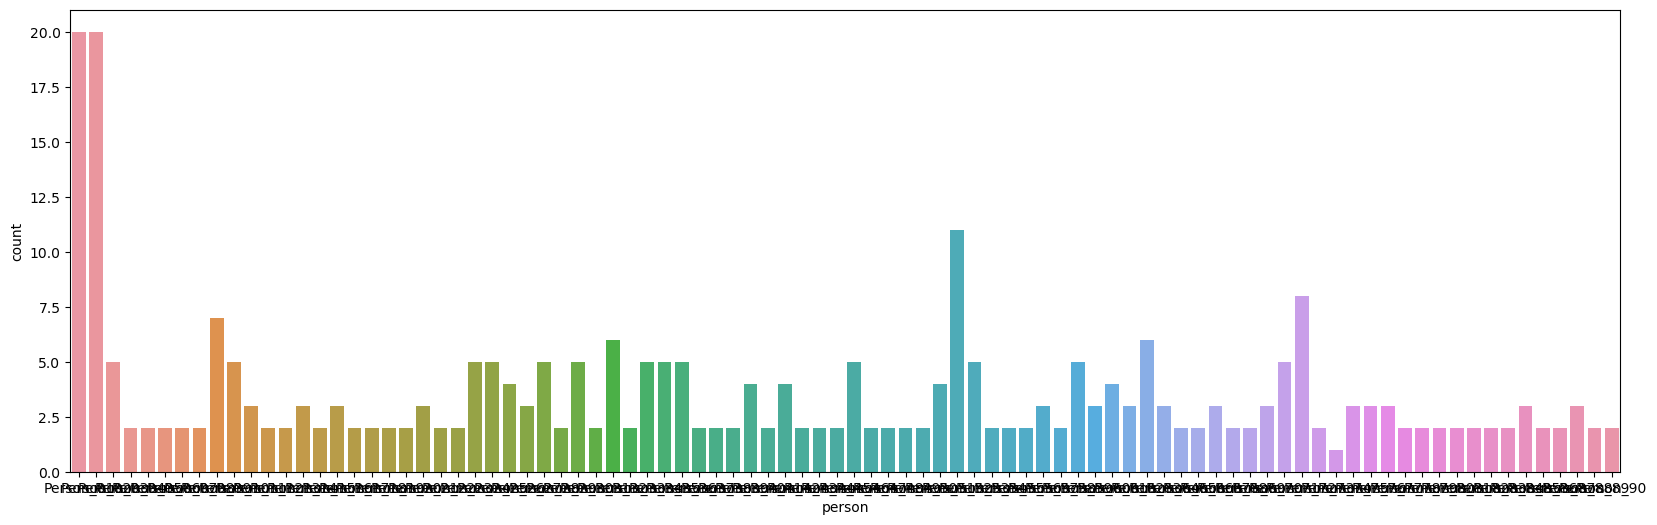

In [7]:
plt.figure(figsize= (20,6))
sns.countplot(x='person',data=df)

In [10]:
df['person'].value_counts()

20

In [33]:
# df.drop(index=df[df['person']=='Person_74'].index, inplace=True)
df_filtered = df.groupby('person').filter(lambda x: len(x) >= 10)

<AxesSubplot:xlabel='person', ylabel='count'>

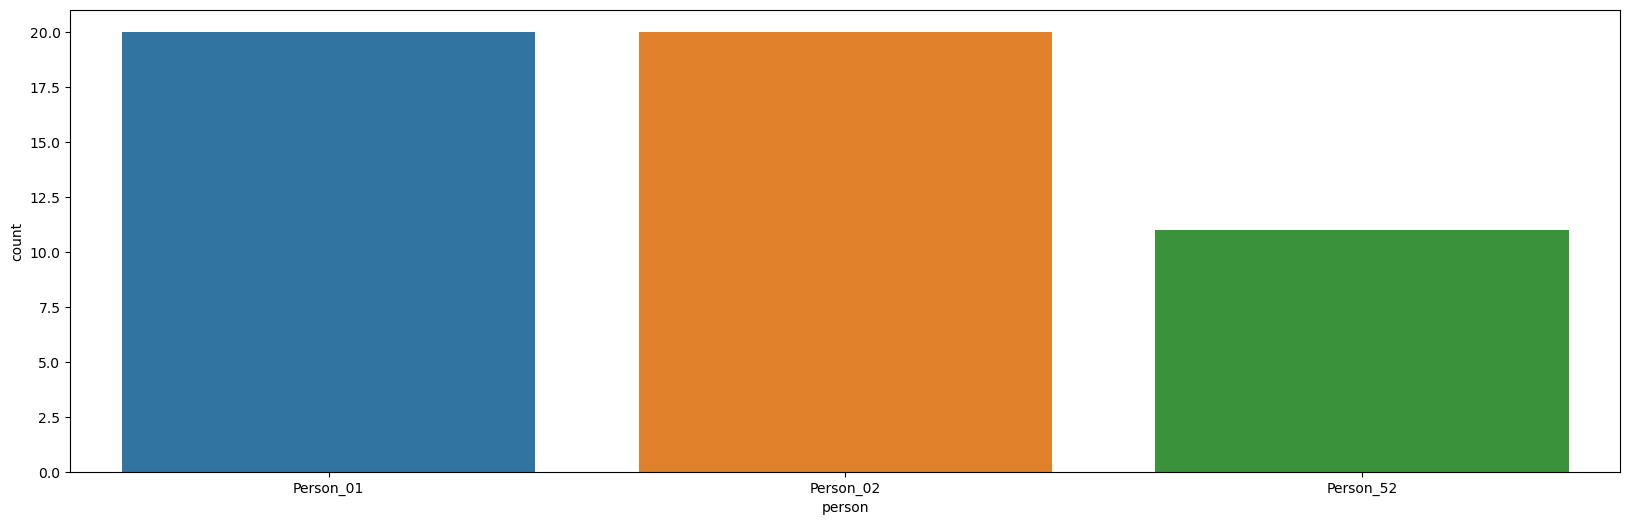

In [34]:
plt.figure(figsize= (20,6))
sns.countplot(x='person',data=df_filtered)

In [35]:
x = df_filtered.drop(['person'],axis=1)
y = df_filtered.person

In [36]:
undersampler = NearMiss(version=1,n_neighbors=1)
x_undersampled, y_undersampled = undersampler.fit_resample(x,y)

c:\Users\Emad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person', ylabel='count'>

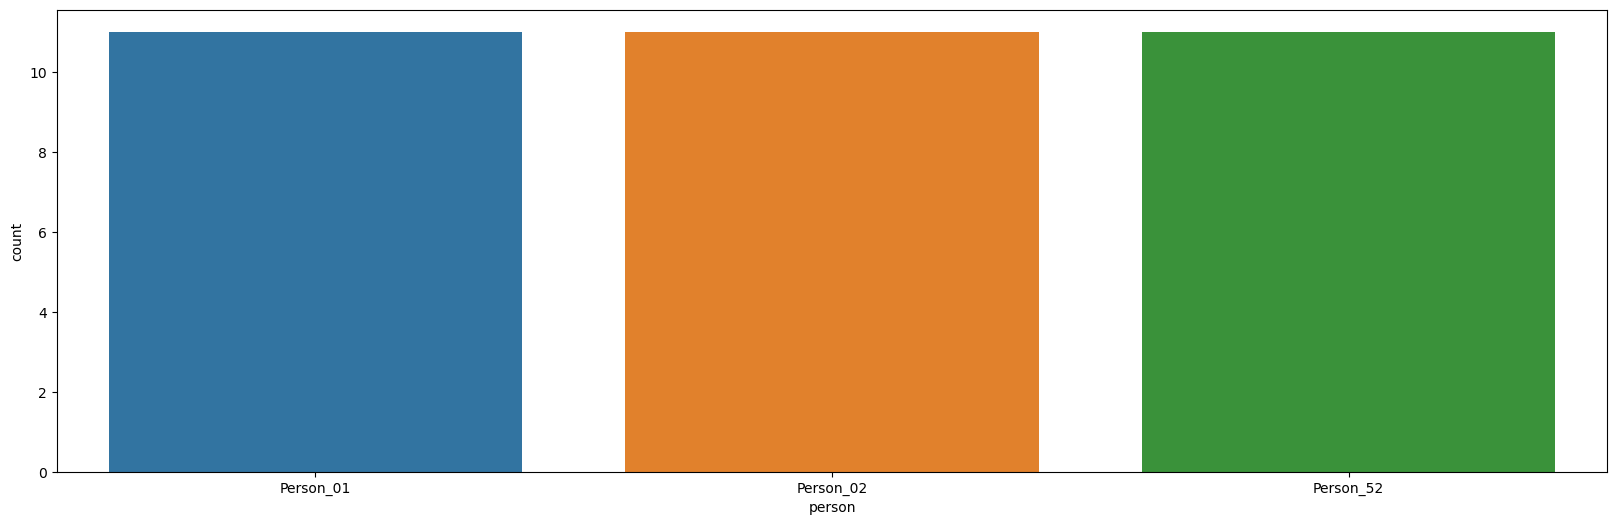

In [37]:
plt.figure(figsize= (20,6))
sns.countplot(y_undersampled)

In [38]:
x_undersampled

,2,3,4,5,6,7,8,9,10,11,...,992,993,994,995,996,997,998,999,1000,1001
0,28.800191,7.888640,0.055250,0.316979,1.411602,6.827484,-0.141701,0.367118,-0.213019,0.537648,...,-0.079503,-0.081510,-0.073084,-0.087633,-0.087550,-0.083024,-0.084234,-0.083030,-0.083386,-0.082763
1,27.755662,6.640934,-0.334281,0.853545,-0.194083,3.360496,0.954610,-0.189390,0.025249,0.025074,...,-0.066812,-0.072051,-0.056109,-0.060408,-0.099244,-0.076395,-0.079842,-0.075217,-0.076322,-0.074543
2,27.505837,5.756198,0.560309,0.422238,1.608206,12.166350,1.581543,-0.068264,0.071081,0.349829,...,-0.112522,-0.112565,-0.103804,-0.117103,-0.121143,-0.113548,-0.115742,-0.118699,-0.115892,-0.115100
3,25.088534,7.125702,0.354409,0.483532,1.376279,11.508351,1.728871,0.232129,-0.025774,0.392268,...,-0.109808,-0.116641,-0.096935,-0.119133,-0.133736,-0.117913,-0.121861,-0.117572,-0.118978,-0.117441
4,25.893012,5.407949,-0.330100,0.548069,2.425363,5.508369,-0.033896,0.248948,-0.111257,0.172535,...,-0.024242,-0.095459,0.135268,-0.157673,-0.275540,-0.112643,-0.153588,-0.108988,-0.124166,-0.106695
5,17.439554,4.621039,-1.941839,2.565514,-3.653124,11.861268,9.672180,-2.843101,1.861014,-1.345132,...,-0.126401,-0.127514,-0.123369,-0.118609,-0.141188,-0.131854,-0.131823,-0.129988,-0.129807,-0.130063
6,23.112658,8.538781,0.425793,1.230016,0.005141,2.029600,0.491016,0.114648,0.072702,0.085432,...,-0.060499,-0.065538,-0.050634,-0.052927,-0.092265,-0.070342,-0.072712,-0.068174,-0.069512,-0.067895
7,21.728105,-0.210206,13.817199,0.240768,9.930746,11.692857,0.996308,1.325309,-0.408698,1.321695,...,-0.128937,-0.128886,-0.128580,-0.128434,-0.129542,-0.128968,-0.129040,-0.128927,-0.129132,-0.128843
8,11.777599,2.107501,0.685181,-0.904224,4.206860,19.559812,1.906567,-0.019333,-0.033547,0.891750,...,-0.141587,-0.143061,-0.119399,-0.076156,-0.251659,-0.186428,-0.177225,-0.169056,-0.168310,-0.162632
9,8.891512,9.454880,1.580336,3.151586,-1.459394,20.474485,4.746246,-0.493598,1.328868,0.017198,...,-0.147219,-0.149355,-0.142214,-0.143288,-0.161009,-0.151126,-0.152309,-0.151184,-0.150931,-0.150573


In [39]:
y_undersampled[0]

'Person_01'

In [40]:
x_train = x_undersampled[::2]
x_test = x_undersampled[1::2]
y_train = y_undersampled[::2]
y_test = y_undersampled[1::2]

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [42]:
gbm.fit(x_train, y_train)


GradientBoostingClassifier()

In [43]:
ytrain_pred = gbm.predict(x_train)
accuracy = accuracy_score(y_train, ytrain_pred)
print('Train Accuracy: ', accuracy)

Train Accuracy:  1.0


In [44]:
ytest_pred = gbm.predict(x_test)
accuracy = accuracy_score(y_test, ytest_pred)
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.8125


In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
# create an SVM classifier object
clf = svm.SVC(kernel='linear')

# train the SVM classifier on the training data
clf.fit(x_train, y_train)

SVC(kernel='linear')

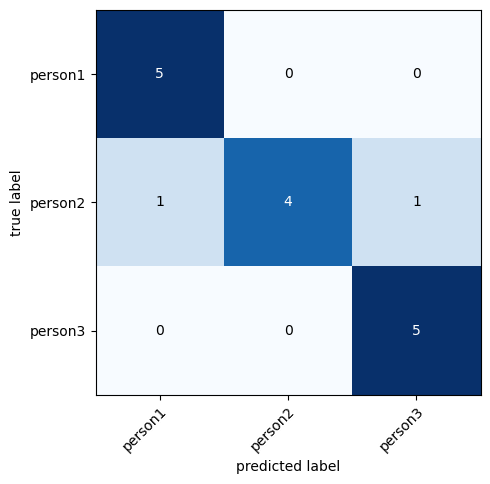

In [51]:
# make predictions on the testing data
y_pred = clf.predict(x_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# print the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred),class_names=["person1","person2","person3"],figsize=(12,5)); 

In [48]:
svm_train_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, svm_train_pred)
print('SVM Train Accuracy: ', accuracy)

SVM Train Accuracy:  0.9411764705882353


In [49]:
print("svm test accuracy : ",accuracy)

svm test accuracy :  0.9411764705882353
